# Pair Programming Estadística I
Empezamos una nueva lección, y este es el momento de poner en práctica los conocimientos adquiridos del Estadística Descriptiva básica. En este caso vamos a darle un giro de tuerca a la forma en la que se ha resuelto los ejercicios de la Pair de hasta ahora! Para ello os vamos a pedir que por vuestra cuenta busqueis un dataset que os guste, por ejemplo de Kaggle o de donde queráis extraerlo. De esta forma vamos a estudiar los diferentes estadísiticos que contiene en dataset seleccionado Para todas los ejercicios de pair programming de Estadística I, II y III usaremos el dataframe que se tome para el desarrollo de este ejercicio de pair programming.

In [1]:
import numpy as np
from scipy import stats # importando scipy.stats
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

## 1. Buscar un conjunto de datos a analizar:
Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas. Ya que también se analizarán.

## World Disaster Risk Dataset

The WorldRiskReport is an annual technical report on global disaster risks. The yearly issues of the WorldRiskReport focus on varying critical topics related to disaster risk management and are published in German and English. The report includes the WorldRiskIndex, which identifies the risk of an extreme natural event becoming a disaster for numerous countries worldwide.


The WorldRiskIndex uses 27 aggregated, publicly available indicators to determine disaster risk for 181 countries worldwide. Conceptually, the index is composed of exposure to extreme natural hazards and the societal vulnerability of individual countries. Earthquakes, cyclones, floods, droughts, and climate-induced sea-level rise are considered in the exposure analysis. Societal vulnerability is divided into susceptibility to extreme natural events, lack of coping capacities, and lack of adaptive capacities. All index components are scaled to the value range from 0 to 100. The higher a country's index score on the WorldRiskIndex, the higher its national disaster risk.

The dataset consists of 11 years data of multiple countries with features including:

- Region: Name of the region.
- WRI : World Risk Score of the region.
- Exposure: Risk/exposure to natural hazards such as earthquakes, hurricanes, floods, droughts, and sea ​​level rise.
- Vulnerability: Vulnerability depending on infrastructure, nutrition, housing situation, and economic framework conditions.
- Susceptibility
- Lack of Coping Capabilities
- Lack of Adaptive Capabilities
- Year
- WRI Category
- Exposure Category
- Vulnerability Category
- Susceptibility Category

https://www.kaggle.com/datasets/tr1gg3rtrash/global-disaster-risk-index-time-series-dataset?resource=download

In [2]:
# Leemos el arhivo
df_risk = pd.read_csv("files/world_risk_index.csv", index_col=0)
df_risk.head(2)

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
Region,,,,,,,,,,,
Vanuatu,32.00,56.33,56.81,37.14,79.34,53.96,2011,Very High,Very High,High,High
Tonga,29.08,56.04,51.90,28.94,81.80,44.97,2011,Very High,Very High,Medium,Medium


- Exploramos el df

In [3]:
df_risk.shape

(1917, 11)

In [4]:
df_risk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1917 entries, Vanuatu to Qatar
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   WRI                           1917 non-null   float64
 1   Exposure                      1917 non-null   float64
 2   Vulnerability                 1917 non-null   float64
 3   Susceptibility                1917 non-null   float64
 4   Lack of Coping Capabilities   1917 non-null   float64
 5    Lack of Adaptive Capacities  1916 non-null   float64
 6   Year                          1917 non-null   int64  
 7   Exposure Category             1917 non-null   object 
 8   WRI Category                  1916 non-null   object 
 9   Vulnerability Category        1913 non-null   object 
 10  Susceptibility Category       1917 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 179.7+ KB


In [5]:
df_risk.describe().T

,count,mean,std,min,25%,50%,75%,max
WRI,1917.0,7.551763,5.553257,0.02,3.7400,6.52,9.400,56.71
Exposure,1917.0,15.388336,10.240135,0.05,10.1600,12.76,16.450,99.88
Vulnerability,1917.0,48.075759,13.835666,14.31,37.0400,47.10,60.060,76.47
Susceptibility,1917.0,30.739431,15.667030,8.26,17.7900,25.40,42.640,70.83
Lack of Coping Capabilities,1917.0,70.438289,15.038854,31.59,59.3300,74.23,83.000,94.36
Lack of Adaptive Capacities,1916.0,43.090511,13.551156,11.16,33.1925,43.08,53.065,76.11
Year,1917.0,2016.049557,3.182045,2011.00,2013.0000,2016.00,2019.000,2021.00


In [6]:
len(df_risk.describe().T)

7

In [7]:
df_risk.describe(include="object").T

,count,unique,top,freq
Exposure Category,1917,5,Very Low,393
WRI Category,1916,5,Very Low,393
Vulnerability Category,1913,5,Very Low,386
Susceptibility Category,1917,5,Very Low,390


In [8]:
len(df_risk.describe(include="object").T)

4

In [9]:
df_risk.isna().sum()

WRI                             0
Exposure                        0
Vulnerability                   0
Susceptibility                  0
Lack of Coping Capabilities     0
 Lack of Adaptive Capacities    1
Year                            0
Exposure Category               0
WRI Category                    1
Vulnerability Category          4
Susceptibility Category         0
dtype: int64

In [10]:
df_risk.duplicated().sum()

0

Homogenizamos los nombres de las columnas:

In [23]:
columnas_min = {col:col.lower().strip().replace(" ","_") for col in df_risk.columns}
df_risk.rename(columns = columnas_min, inplace=True)
df_risk.columns

Index(['wri', 'exposure', 'vulnerability', 'susceptibility',
       'lack_of_coping_capabilities', 'lack_of_adaptive_capacities', 'year',
       'exposure_category', 'wri_category', 'vulnerability_category',
       'susceptibility_category'],
      dtype='object')

## 2. Extraer los siguentes estadísiticos del conjunto de datos para varias de las variables disponibles:
- Media
- Desviación con respecto de la media
- Varianza
- Desviación típica
- Moda
- Mediana
- Media ponderada
- Robustez
- Coeficiente de variación

## Medidas de tendencia central
- Media
- Mediana
- Moda

In [24]:
df_risk.columns

Index(['wri', 'exposure', 'vulnerability', 'susceptibility',
       'lack_of_coping_capabilities', 'lack_of_adaptive_capacities', 'year',
       'exposure_category', 'wri_category', 'vulnerability_category',
       'susceptibility_category'],
      dtype='object')

In [25]:
# Función para sacar la media
def sacar_media (df,col):
    media = df[col].mean()
    return media

In [26]:
media_vul= sacar_media(df_risk,"vulnerability")
media_vul

48.07575899843497

In [27]:
media_wri = sacar_media(df_risk,"wri")
media_wri

7.551763171622318

In [28]:
# Función para sacar la mediana
def sacar_mediana (df,col):
    mediana = df[col].median()
    return mediana

In [29]:
mediana_vul= sacar_media(df_risk,"vulnerability")
mediana_vul

48.07575899843497

In [30]:
# Función para sacar la moda
def sacar_moda (df,col):
    moda = df[col].mode()
    return moda

In [31]:
moda_vul= sacar_media(df_risk,"vulnerability")
moda_vul

48.07575899843497

In [32]:
# Se crea una función para imprimir los principales estadísticos:
def sacar_estadisticos_central (df,col):
    media = df[col].mean()
    print(f"La media de {col} es {media}")
    print ("------------------------------------------")

    mediana = df[col].median()
    print(f"La mediana de {col} es {mediana}")
    print ("------------------------------------------")

    moda = df[col].mode()
    if len(moda) > 1:
        print(f"""Moda: {col} tiene {len(moda)} modas, las modas son 
{moda}""")
        print ("------------------------------------------")  
    else:
        print(f"La moda de {col} es {moda[0]}")
        print ("------------------------------------------")


In [33]:
sacar_estadisticos_central (df_risk,"wri")

La media de wri es 7.551763171622318
------------------------------------------
La mediana de wri es 6.52
------------------------------------------
Moda: wri tiene 2 modas, las modas son 
0    3.46
1    3.56
Name: wri, dtype: float64
------------------------------------------


In [34]:
sacar_estadisticos_central (df_risk,"exposure")

La media de exposure es 15.388335941575347
------------------------------------------
La mediana de exposure es 12.76
------------------------------------------
La moda de exposure es 12.25
------------------------------------------


- Desviación media

In [35]:
def desviacion_media (df, col):
    media = df[col].mean()
    diferencias = df[col]-media
    desviacion_media = np.abs(diferencias)
    return desviacion_media

In [36]:
desviacion_media (df_risk, "wri")

Region
Vanuatu         24.448237
Tonga           21.528237
Philippinen     16.768237
Salomonen       15.958237
Guatemala       13.328237
                  ...    
Grenada          6.131763
Barbados         6.231763
Saudi Arabia     6.411763
Malta            6.951763
Qatar            7.471763
Name: wri, Length: 1917, dtype: float64

In [37]:
desviacion_media (df_risk, "exposure")

Region
Vanuatu         40.941664
Tonga           40.651664
Philippinen     29.701664
Salomonen       21.011664
Guatemala       23.031664
                  ...    
Grenada         12.258336
Barbados        11.928336
Saudi Arabia    12.458336
Malta           13.738336
Qatar           15.108336
Name: exposure, Length: 1917, dtype: float64

- Media ponderada

Al no existir una ponderación de los datos generamos un valor ficticio

In [38]:
def media_ponderada(df,col):
    w = np.random.randint(0,100, df.shape[0])

    avg = np.average(df[col], weights=w)
    
    return avg

In [39]:
media_ponderada(df_risk,"wri")

7.521815479262577

## Estadísticos generales

- Mínimo
- Máximo

In [40]:
def minimo_maximo (df,col):
    
    minimo = df[col].min()
    print(f"El valor mínimo de {col} es {minimo}")
    print ("------------------------------------------")

    maximo = df[col].max()
    print(f"El valor máximo de {col} es {maximo}")
    print ("------------------------------------------")

In [41]:
minimo_maximo (df_risk,"wri")

El valor mínimo de wri es 0.02
------------------------------------------
El valor máximo de wri es 56.71
------------------------------------------


In [42]:
df_risk[df_risk['wri'] == df_risk['wri'].max()]

,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year,exposure_category,wri_category,vulnerability_category,susceptibility_category
Region,,,,,,,,,,,
Vanuatu,56.71,99.88,56.78,35.32,84.36,50.66,2019,Very High,Very High,High,High


In [43]:
df_risk[df_risk['wri'] == df_risk['wri'].min()]

,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year,exposure_category,wri_category,vulnerability_category,susceptibility_category
Region,,,,,,,,,,,
Katar,0.02,0.05,33.18,9.4,52.12,38.03,2011,Very Low,Very Low,Very Low,Very Low


## Medidas de dispersión

- Varianza
- Desviación típica
- Coeficiente de variación

In [44]:
# Se crea una función para obtener los principales estadísticos:
def sacar_dispersion_cuanti (df,col):
    print ("Medidas de dispersión:")
    print ("------------------------------------------")
    
    varianza = df[col].var()
    print(f"La varianza de {col} es {varianza}")
    print ("------------------------------------------")
    
    desviacion = df[col].std()
    print(f"La desviación estándar o típica de {col} es {desviacion}")
    print ("------------------------------------------")
    
    coe_variacion = (df[col].mean() / df[col].std())
    print(f"El coeficiente de variación de {col} es {coe_variacion}")
   

In [45]:
sacar_dispersion_cuanti (df_risk,"wri")

Medidas de dispersión:
------------------------------------------
La varianza de wri es 30.838664112985438
------------------------------------------
La desviación estándar o típica de wri es 5.553257072474264
------------------------------------------
El coeficiente de variación de wri es 1.3598799898989038


In [46]:
sacar_dispersion_cuanti (df_risk,"exposure")

Medidas de dispersión:
------------------------------------------
La varianza de exposure es 104.86037087247054
------------------------------------------
La desviación estándar o típica de exposure es 10.240135295613557
------------------------------------------
El coeficiente de variación de exposure es 1.5027473268021236


## Robustez

In [47]:
# Identificamos las variables numéricas
df_risk.describe().T

,count,mean,std,min,25%,50%,75%,max
wri,1917.0,7.551763,5.553257,0.02,3.7400,6.52,9.400,56.71
exposure,1917.0,15.388336,10.240135,0.05,10.1600,12.76,16.450,99.88
vulnerability,1917.0,48.075759,13.835666,14.31,37.0400,47.10,60.060,76.47
susceptibility,1917.0,30.739431,15.667030,8.26,17.7900,25.40,42.640,70.83
lack_of_coping_capabilities,1917.0,70.438289,15.038854,31.59,59.3300,74.23,83.000,94.36
lack_of_adaptive_capacities,1916.0,43.090511,13.551156,11.16,33.1925,43.08,53.065,76.11
year,1917.0,2016.049557,3.182045,2011.00,2013.0000,2016.00,2019.000,2021.00


Robustez de la columna "vulnerability"

In [49]:
media_vul= sacar_media(df_risk,"vulnerability")
media_vul

48.07575899843497

In [50]:
mediana_vul = sacar_mediana(df_risk,"vulnerability")
mediana_vul

47.1

In [51]:
def graficar_boxplot (df,col):
    
    plt.figure()
    fig = sns.boxplot( x =col, data = df)

    return plt.show()

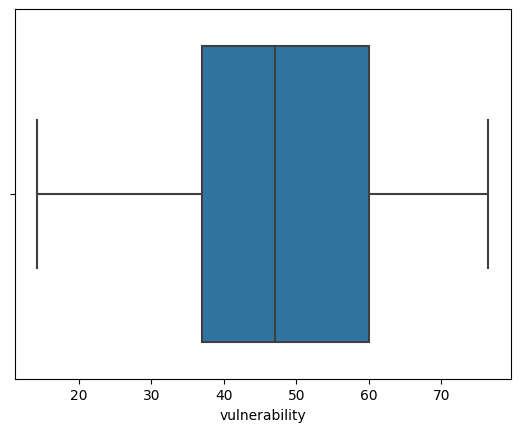

In [52]:
graficar_boxplot(df_risk,"vulnerability")

In [53]:
# Aplicamos la fórmula para calcular la robustez
robus= 1/df_risk.shape[0]
robus

0.0005216484089723526

In [54]:
print(f"""El dato de la robustez es {round(robus,4)} y muestra una robustez alta con un valor muy cercano a cero, 
lo cual se corresponde con los datos que arrojan la media, {round(media_vul, 2)} , y la mediana, {round(mediana_vul,2)}, las cuales varían poco.
En el caso del boxplot se evidencia que no existen outliers o valores externos, los cuales debilitarían la robustez de los datos.""")


El dato de la robustez es 0.0005 y muestra una robustez alta con un valor muy cercano a cero, 
lo cual se corresponde con los datos que arrojan la media, 48.08 , y la mediana, 47.1, las cuales varían poco.
En el caso del boxplot se evidencia que no existen outliers o valores externos, los cuales debilitarían la robustez de los datos.


Robustez de la columna 'lack_of_adaptive_capacities'

In [56]:
media_adap = sacar_media(df_risk,'lack_of_adaptive_capacities')
media_adap

43.090511482254705

In [57]:
mediana_adap = sacar_mediana(df_risk,'lack_of_adaptive_capacities')

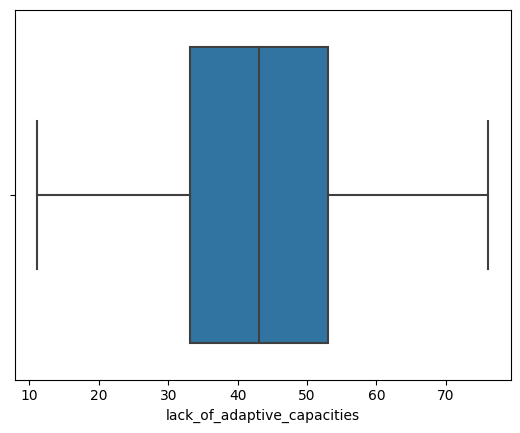

In [58]:
graficar_boxplot(df_risk,'lack_of_adaptive_capacities')

In [59]:
# Aplicamos la fórmula para calcular la robustez
robus= round( 1/df_risk.shape[0], 4)
robus

0.0005

In [60]:
print(f"""El dato de la robustez es {round(robus,4)} y muestra una robustez alta con un valor muy cercano a cero, 
lo cual se corresponde con los datos que arrojan la media, {round(media_adap, 2)} , y la mediana, {round(mediana_adap,2)}, las cuales varían mínimamente.
En el caso del boxplot se evidencia que no existen outliers o valores externos, los cuales pudiesen debilitar la robustez de los datos.""")

El dato de la robustez es 0.0005 y muestra una robustez alta con un valor muy cercano a cero, 
lo cual se corresponde con los datos que arrojan la media, 43.09 , y la mediana, 43.08, las cuales varían mínimamente.
En el caso del boxplot se evidencia que no existen outliers o valores externos, los cuales pudiesen debilitar la robustez de los datos.


## Otras opciones

El siguiente código nos permite sacar los eatadísticos de todas variables numéricas, sin embargo, este dificulta la lectura de los resultados.

In [61]:
#for i in df_risk.describe():
    #print (i)

    #media = df_risk[i].mean()
    #print(f"La media de {i} es {media}")
    
    #mediana = df_risk[i].median()
    #print(f"La mediana de {i} es {mediana}")
    
    #moda = df_risk[i].mode()
    #print(f"La moda de {i} es {moda}")
    
    #minimo = df_risk[i].min()
    #print(f"El mínimo de {i} es {minimo}")

    #maximo = df_risk[i].max()
    #print(f"El máximo de {i} es {maximo}")


## 3. Interpretación resultados

Columna WRI

Tenemos 1917 valores en la columna WRI (World Risk Score de una región). El país que encabeza este ranking es Vanuatu, con 56.71 puntos, donde aproximadamente 90.000 personas se encuentran en riesgo debido a los ciclones, volcanes, terremotos y tsunamis derivados del cambio climático y su localización en el Pacífico Sur. Por otra parte, el país con menos riesgo es Qatar, con una puntuación de 0.02. Ambos países están muy alejados de la media, situada en 56.71.

La media de WRI y mediana son valores fiables, si bien la variable tiene varios outliers debido a que la muestra es amplia, lo que se demuestra en la robustez que tiene un valor de 0.0005.

---------------

In [62]:
len((df_risk)['wri'])

1917

In [67]:
sacar_media(df_risk,"wri")

7.551763171622318

In [68]:
sacar_mediana(df_risk,"wri")

6.52

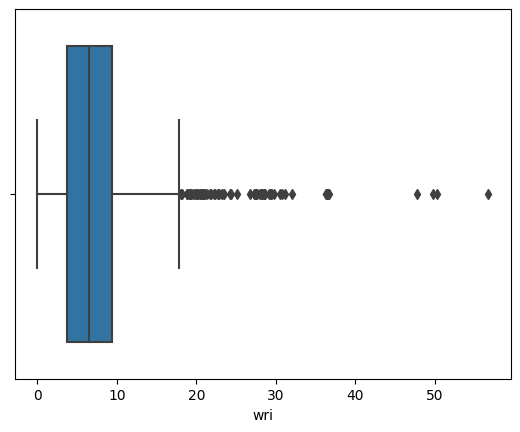

In [72]:
plt.figure()

fig= sns.boxplot(x="wri", data=df_risk)

Columna Exposure

La desviación estándar es una forma de medir la distancia típica entre los valores y la media. Nos dice cómo de dispersos están nuestros datos en un conjunto de datos. En el caso de exposure, la desvición estándar es 10,24, quecomparada con la media, evidencia una dispersión alta de los datos. Esto se comprueba con los valores mínimo (0.05) y máximo(99.5).  Esto puede decirnos que la media no es tan representativa, puesto que igual tenemos países con datos de riesgo muy elevados.

Como evidencia el boxplot, los datos de concentran con un sesgo a la derecha, por la presencia de numerosos outliers. Esto nos indica que existen países con un riesgo muy alto. Sin emabrgo, la robustez de la muestra es alta (0.0005). 



In [70]:
sacar_media(df_risk,"exposure")

15.388335941575347

In [71]:
sacar_mediana(df_risk,"exposure")

12.76

In [73]:
minimo_maximo(df_risk,"exposure")

El valor mínimo de exposure es 0.05
------------------------------------------
El valor máximo de exposure es 99.88
------------------------------------------


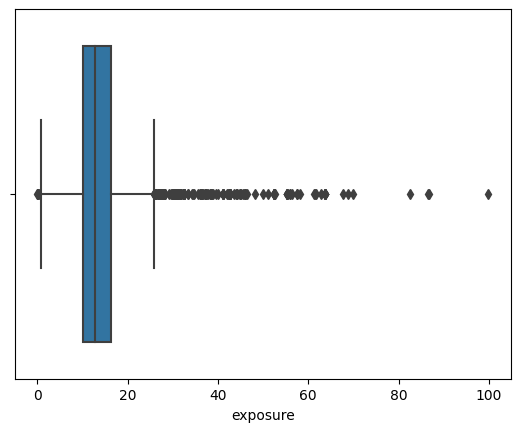

In [63]:
plt.figure()

fig= sns.boxplot(x="exposure", data=df_risk)